In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

def run(Lx,M,noqueue=False):
    if noqueue:
        os.system("python RNN_QSR.py %d %.3f nq"%(Lx,M))
    else:
        os.system("python RNN_QSR.py %d %.3f"%(Lx,M))

def show(Lx,Ly,M,mydir=None,noqueue=False):
    
    exact_energy = {16:-0.4534,36:-0.4221,64:-0.40522,144:-0.38852,256:-0.38052,576:-0.36,1024:-0.34}[Lx*Ly]
    if type(mydir)==type(None):
        bsize=512
        BlockNum=(Lx*Ly)//8
        BbyL=bsize//BlockNum
        bsize=BbyL*BlockNum
        print(bsize,BlockNum,BbyL,Lx*Ly)
        if noqueue:
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,BbyL,BbyL)
        else:
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,bsize,BbyL)
    
    DEBUG = np.load(mydir+"/DEBUG.npy")
    
    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(DEBUG[:,5]/Lx/Ly-exact_energy,alpha=0.1,color='b',marker='o',markersize=2,linewidth=0.0,markevery=5,label="RNN Sample")
    plt.plot(DEBUG[:,1]/Lx/Ly-exact_energy,'ro',ms=0.5,lw=0.0,label="RNN Train")
    plt.yscale("log")
    plt.ylim(1e-5,5)
    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
    plt.legend(loc="best")
    plt.show()
    
    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(DEBUG[:,5]/Lx/Ly,'bo',markersize=0.5,linewidth=0.0,markevery=5,label="RNN Sample")
    plt.plot(DEBUG[:,1]/Lx/Ly,'ro',markersize=0.5,linewidth=0.0,markevery=5,label="RNN Train")
    plt.plot([0,len(DEBUG)],[exact_energy,exact_energy],'k--')
    plt.ylim(max(min(DEBUG[:,1])-0.3,-1),0.5)
    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.legend(loc="best")
    plt.show()
    
    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(DEBUG[:,5]/Lx/Ly-exact_energy,'bo',ms=2,label="Sample")
    plt.plot(DEBUG[:,3]/Lx/Ly-exact_energy,'ro',ms=1,lw=1,label="Corrected (Training)")
    plt.yscale("log")
    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
    plt.legend(loc="best")
    plt.show()
    print("TIME: %.0fs"%DEBUG[-1][-1])
    print("Last Corrected %.4f"% (DEBUG[-1,3]/Lx/Ly))

In [2]:
#show(32,32,0.99,mydir="out/stable")

# 4x4 Queue

In [3]:
run(4,0.99)

512 2 256 16


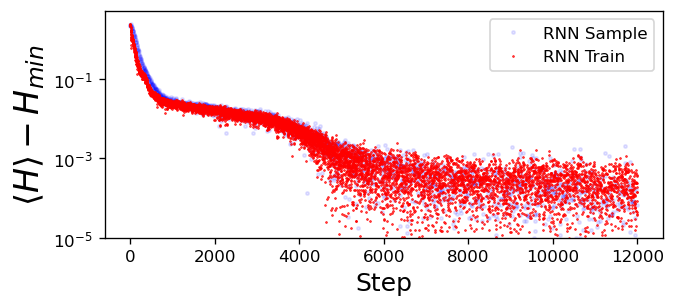

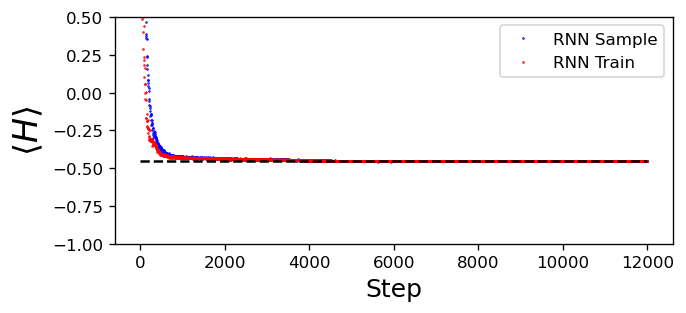

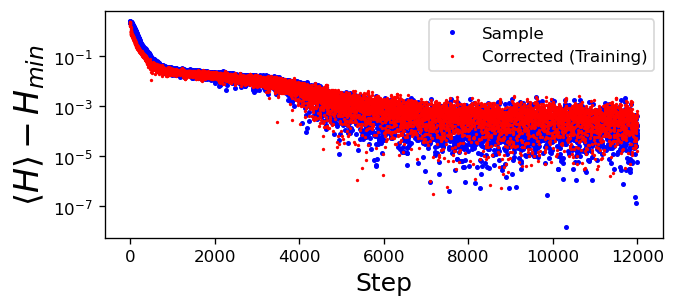

TIME: 136s
Last Corrected -0.4533


In [29]:
show(4,4,0.99)

# 6x6 Queue


In [5]:
run(6,0.99)

512 4 128 36


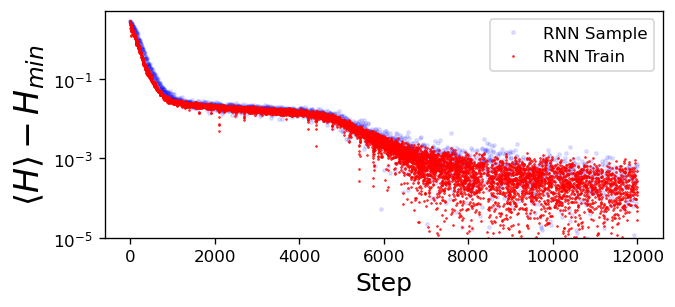

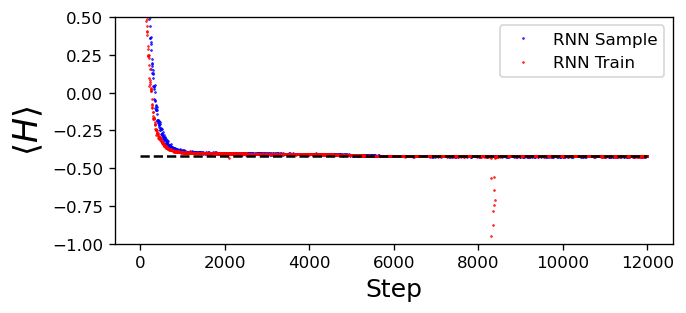

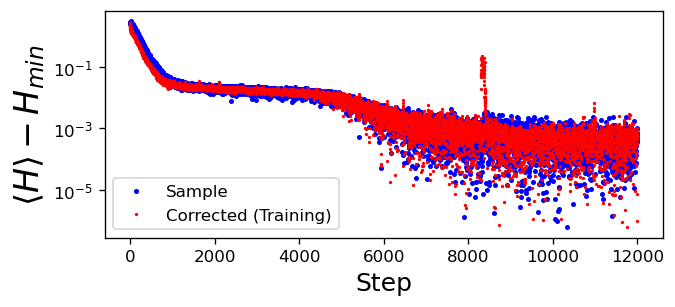

TIME: 266s
Last Corrected -0.4221


In [30]:
show(6,6,0.99)

# 8x8 Queue


In [7]:
run(8,0.99)

512 8 64 64


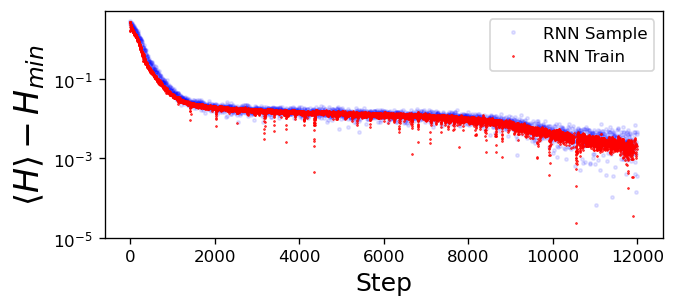

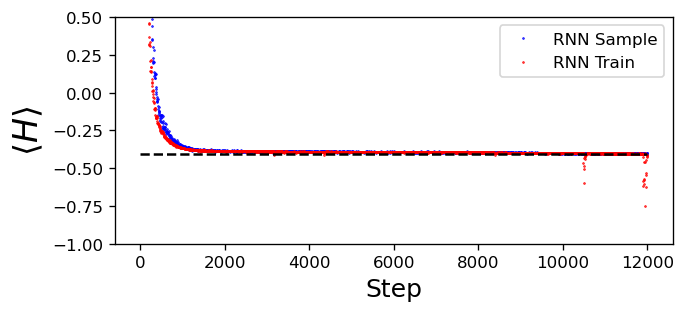

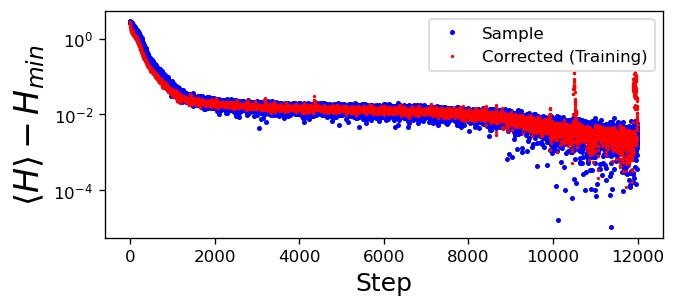

TIME: 428s
Last Corrected -0.4027


In [8]:
show(8,8,0.99)

# 12x12 Queue


In [9]:
run(12,0.99)

504 18 28 144


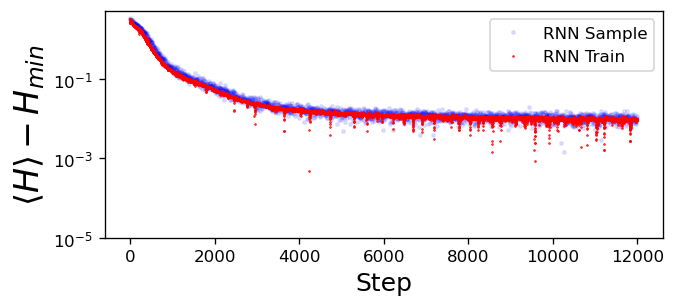

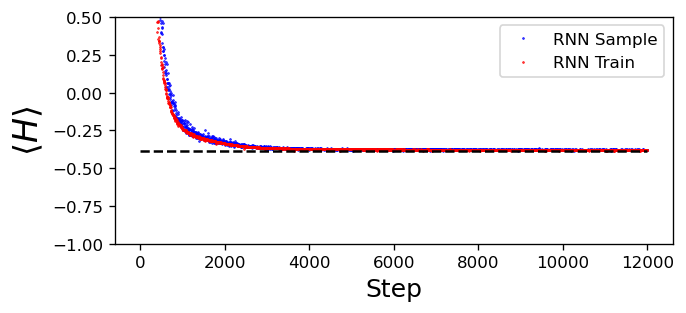

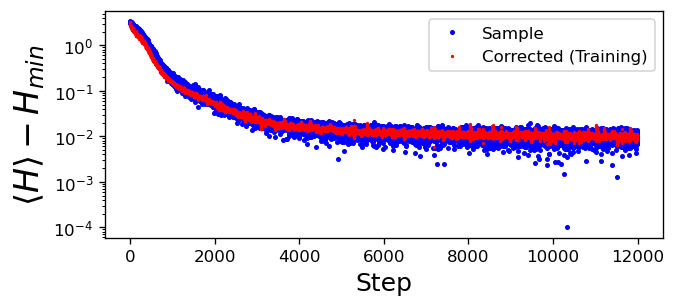

TIME: 906s
Last Corrected -0.3786


In [10]:
show(12,12,0.99)

# 16x16 Queue


In [11]:
run(16,0.99)

512 32 16 256


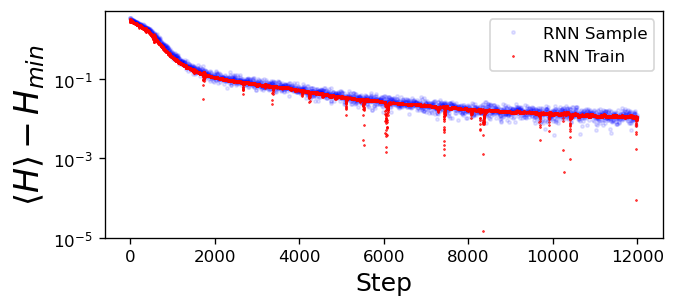

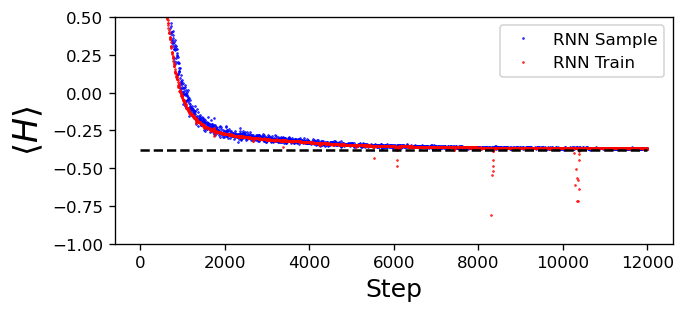

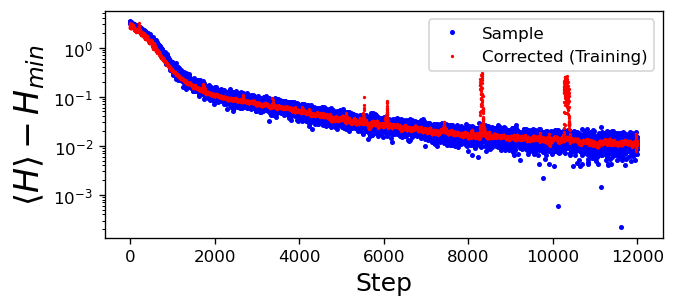

TIME: 1621s
Last Corrected -0.3681


In [12]:
show(16,16,0.99)

# No momentum:

512 2 256 16


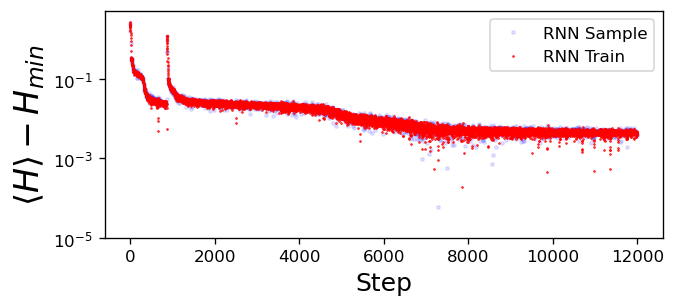

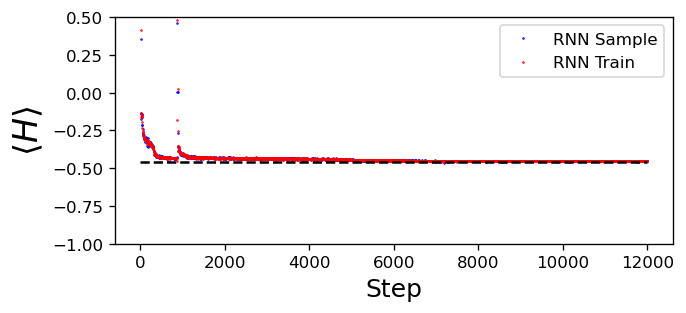

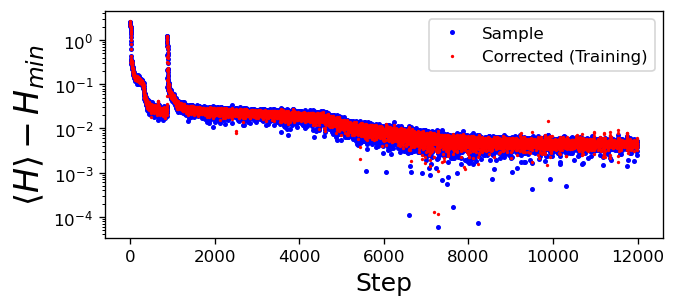

TIME: 137s
Last Corrected -0.4527
512 4 128 36


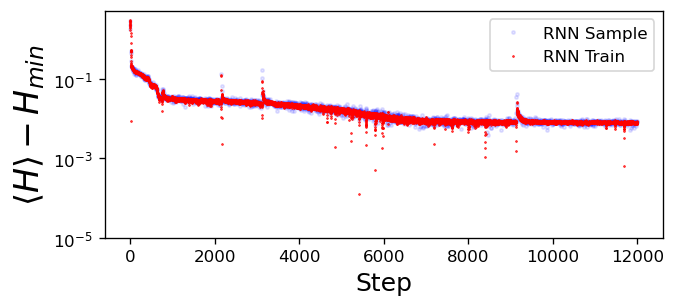

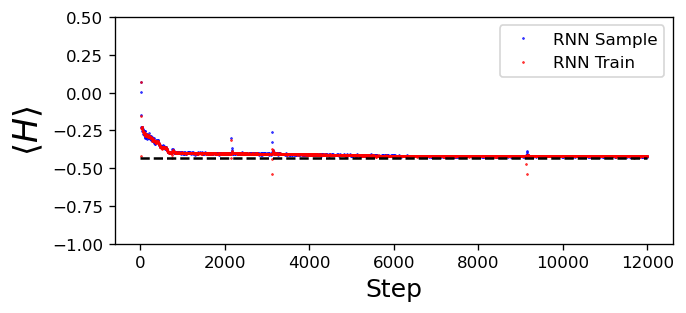

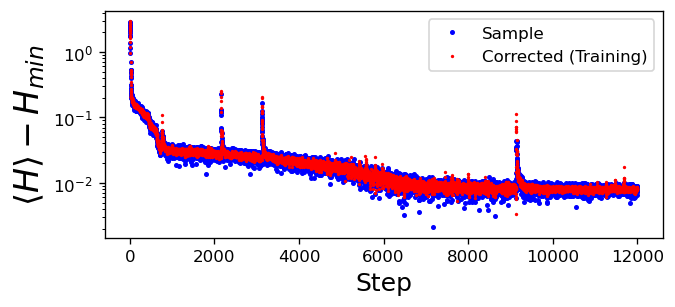

TIME: 276s
Last Corrected -0.4214
512 8 64 64


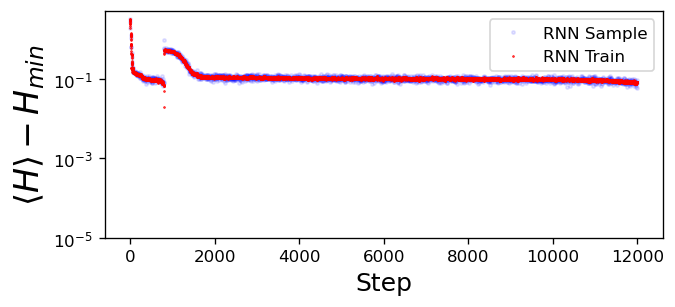

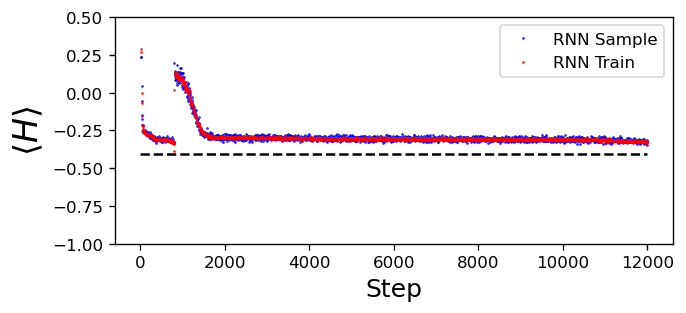

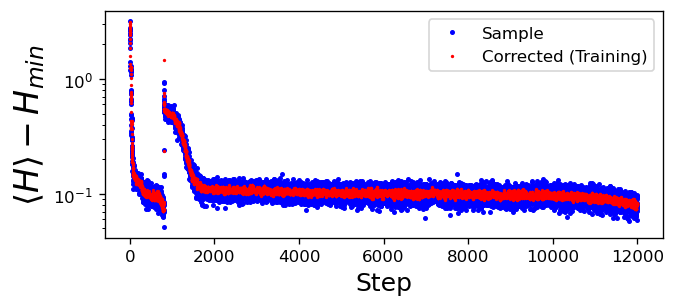

TIME: 429s
Last Corrected -0.3250
504 18 28 144


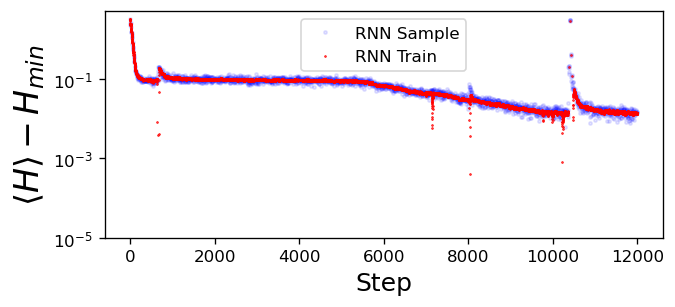

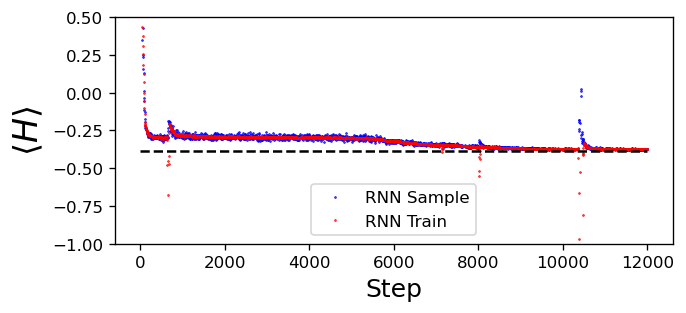

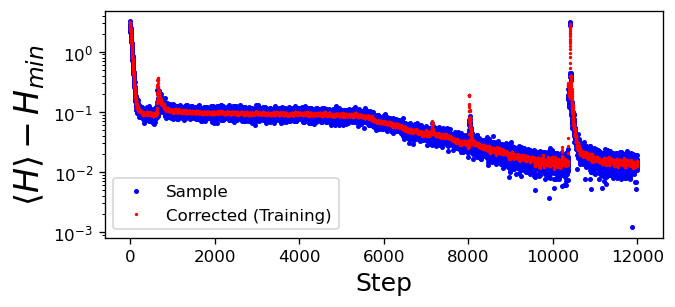

TIME: 909s
Last Corrected -0.3739
512 32 16 256


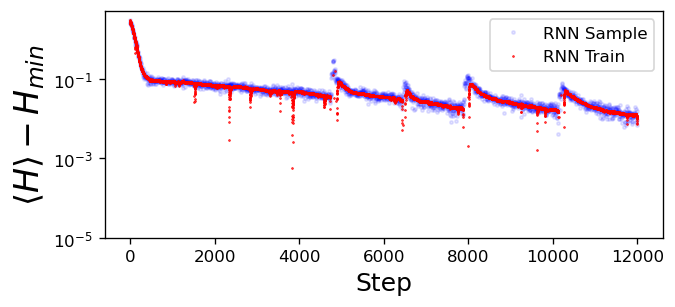

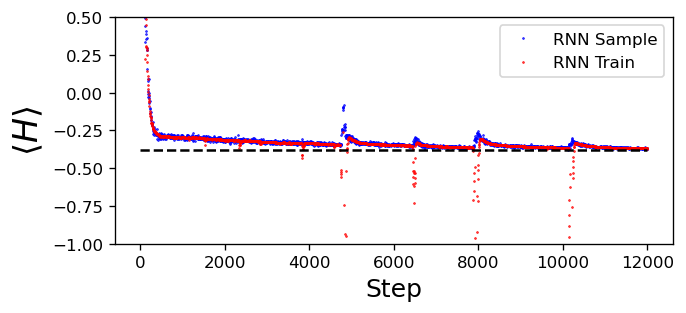

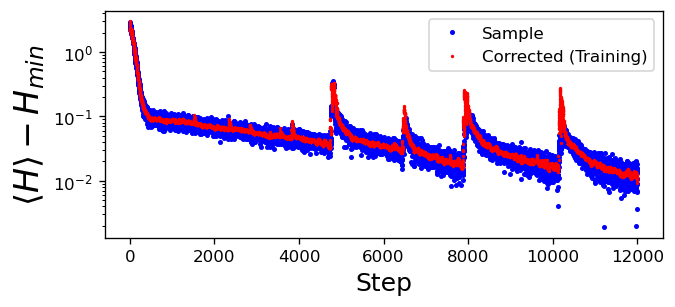

TIME: 1595s
Last Corrected -0.3702


In [13]:
run(4,0.0)
run(6,0.0)
run(8,0.0)
run(12,0.0)
run(16,0.0)
show(4,4,0.0)
show(6,6,0.0)
show(8,8,0.0)
show(12,12,0.0)
show(16,16,0.0)

# No Queue



512 2 256 16


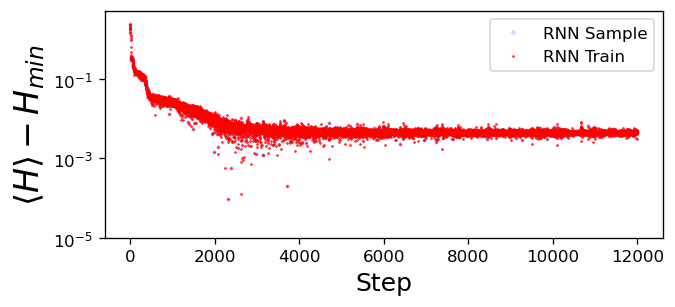

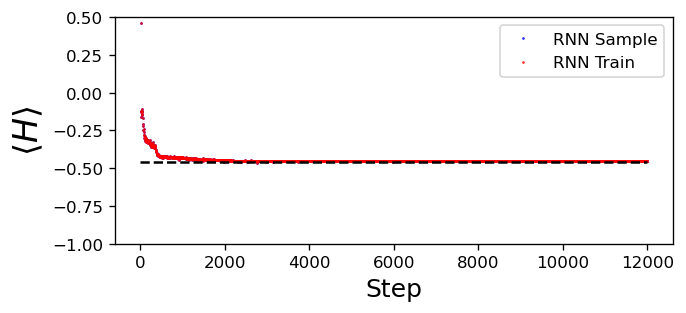

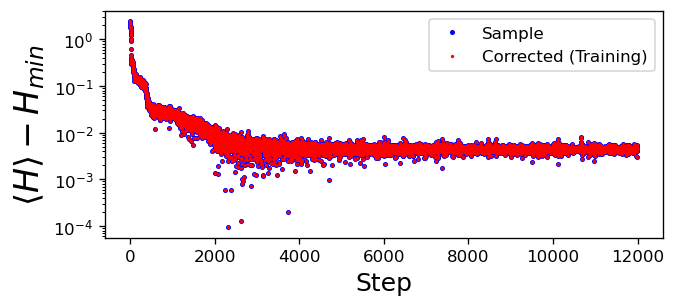

TIME: 137s
Last Corrected -0.4533
512 4 128 36


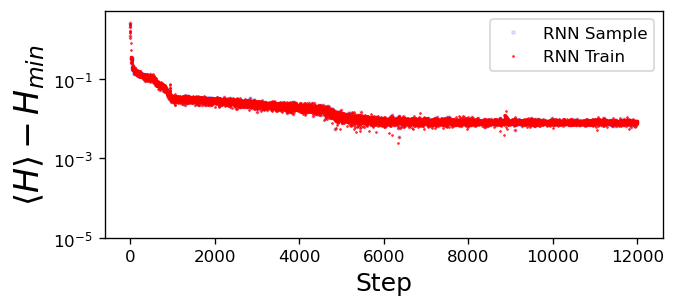

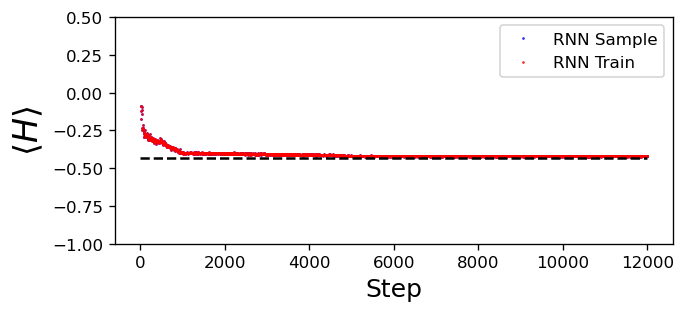

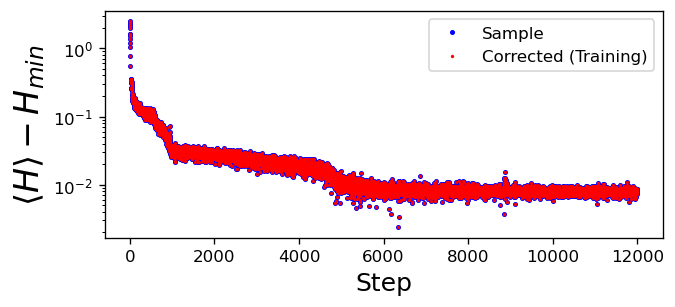

TIME: 266s
Last Corrected -0.4222
512 8 64 64


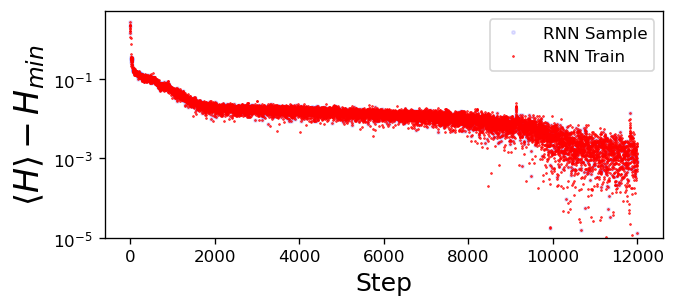

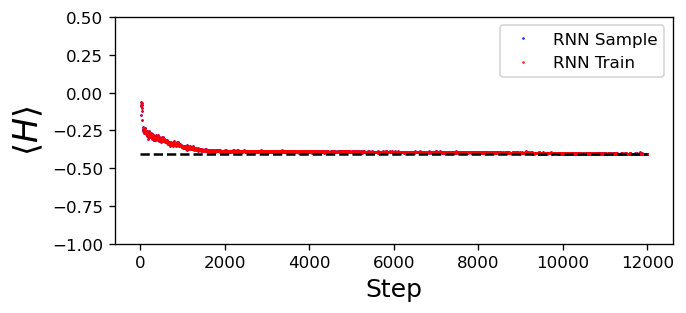

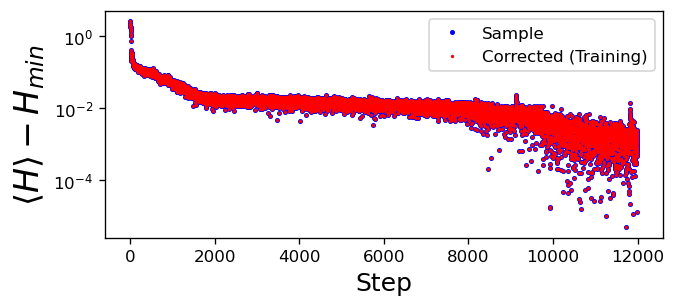

TIME: 430s
Last Corrected -0.4038
504 18 28 144


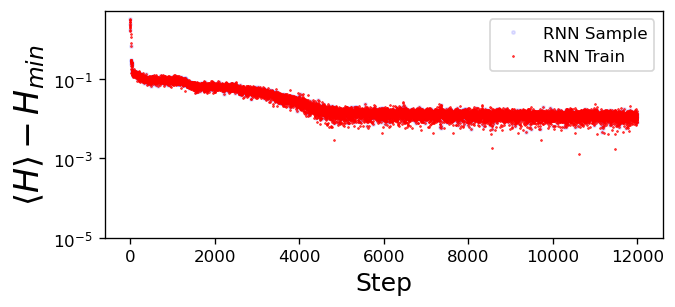

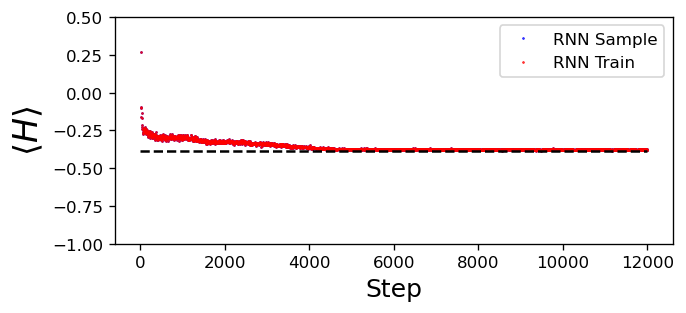

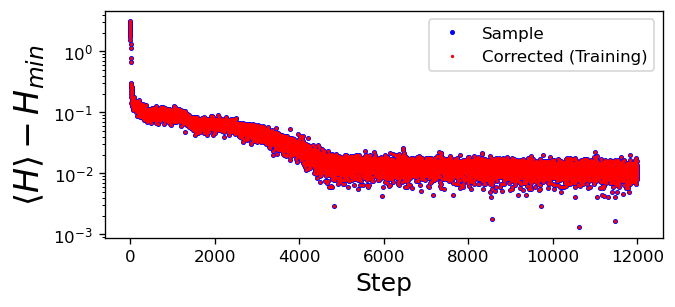

TIME: 854s
Last Corrected -0.3795
512 32 16 256


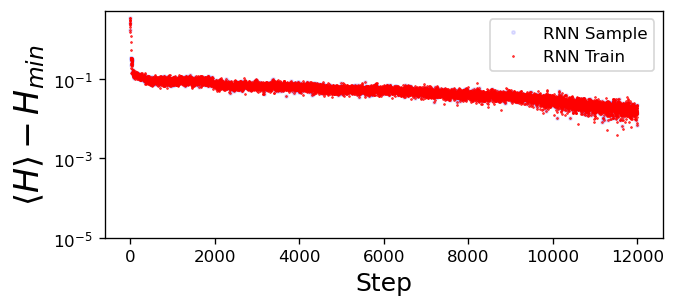

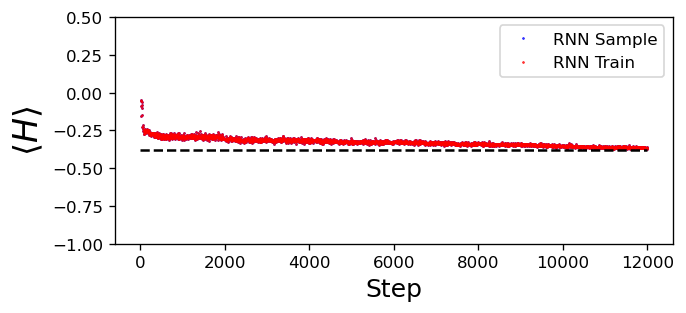

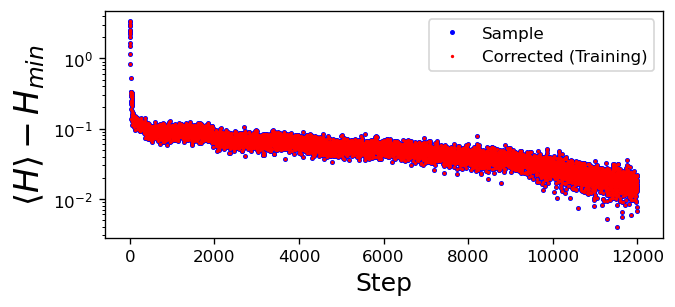

TIME: 1501s
Last Corrected -0.3641


In [14]:
run(4,0.0,noqueue=True)
run(6,0.0,noqueue=True)
run(8,0.0,noqueue=True)
run(12,0.0,noqueue=True)
run(16,0.0,noqueue=True)
show(4,4,0.0,noqueue=True)
show(6,6,0.0,noqueue=True)
show(8,8,0.0,noqueue=True)
show(12,12,0.0,noqueue=True)
show(16,16,0.0,noqueue=True)

# Comparing 16x16 results

16 1 16 256
512 32 16 256
512 32 16 256


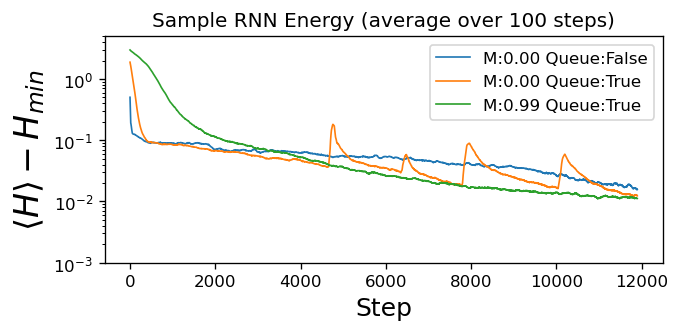

16 1 16 256
512 32 16 256
512 32 16 256


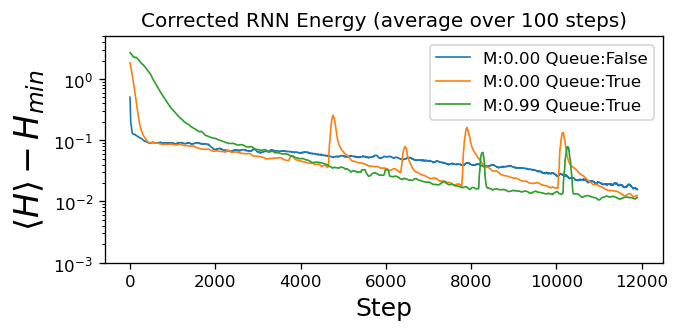

16 1 16 256
512 32 16 256
512 32 16 256


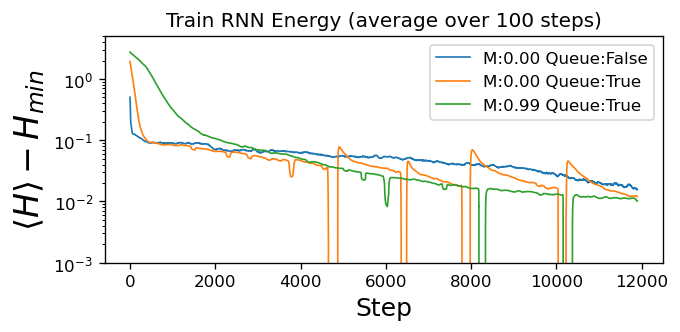

In [3]:
def plot_sample(Lx,Ly,M,mydir=None,noqueue=False,idx=5):
    
    exact_energy = {16:-0.4534,36:-0.4221,64:-0.40522,144:-0.38852,256:-0.38052,576:-0.36,1024:-0.34}[Lx*Ly]
    if type(mydir)==type(None):
        bsize=512
        BlockNum=(Lx*Ly)//8
        BbyL=bsize//BlockNum
        bsize=BbyL*BlockNum
        
        if noqueue:
            print(BbyL,1,BbyL,Lx*Ly)
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,BbyL,BbyL)
        else:
            print(bsize,BlockNum,BbyL,Lx*Ly)
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,bsize,BbyL)
    
    DEBUG = np.load(mydir+"/DEBUG.npy")
    
    
    avgs = np.array([np.mean(DEBUG[i:i+100,idx]) for i in range(DEBUG.shape[0]-100)])
    
    
    plt.plot(avgs/Lx/Ly-exact_energy,linewidth=1.0,markevery=5,
             label="M:%.2f Queue:%r"%(M,not noqueue))

    
    
fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(16,16,0.0,noqueue=True)
plot_sample(16,16,0.0)
plot_sample(16,16,0.99)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Sample RNN Energy (average over 100 steps)")
plt.show()

fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(16,16,0.0,noqueue=True,idx=3)
plot_sample(16,16,0.0,idx=3)
plot_sample(16,16,0.99,idx=3)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Corrected RNN Energy (average over 100 steps)")
plt.show()


fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(16,16,0.0,noqueue=True,idx=1)
plot_sample(16,16,0.0,idx=1)
plot_sample(16,16,0.99,idx=1)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Train RNN Energy (average over 100 steps)")
plt.show()

In [35]:
run(24,0.99)
run(24,0.0)
run(24,0.0,noqueue=True)

7 1 7 576
504 72 7 576
504 72 7 576


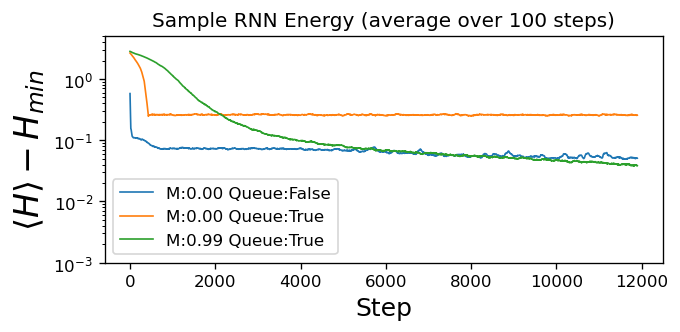

7 1 7 576
504 72 7 576
504 72 7 576


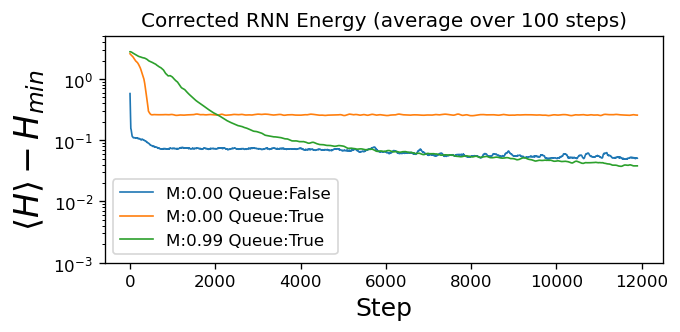

7 1 7 576
504 72 7 576
504 72 7 576


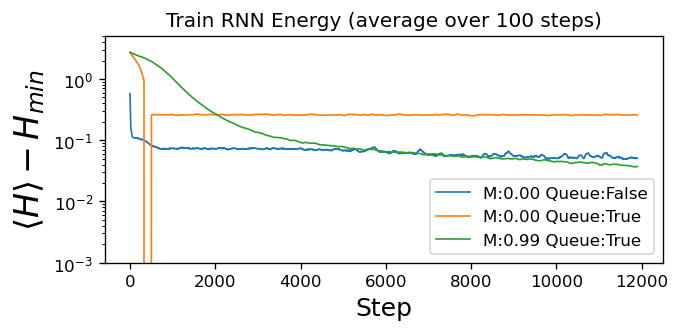

In [4]:
fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(24,24,0.0,noqueue=True)
plot_sample(24,24,0.0)
plot_sample(24,24,0.99)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Sample RNN Energy (average over 100 steps)")
plt.show()

fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(24,24,0.0,noqueue=True,idx=3)
plot_sample(24,24,0.0,idx=3)
plot_sample(24,24,0.99,idx=3)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Corrected RNN Energy (average over 100 steps)")
plt.show()


fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample(24,24,0.0,noqueue=True,idx=1)
plot_sample(24,24,0.0,idx=1)
plot_sample(24,24,0.99,idx=1)
plt.yscale("log")
plt.ylim(1e-3,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Train RNN Energy (average over 100 steps)")
plt.show()

In [40]:
run(32,0.99)
run(32,0.0)
run(32,0.0,noqueue=True)

256 1 256 16
-0.4534569150209427
512 2 256 16
-0.4533902561664581
512 2 256 16
-0.45347503781318665


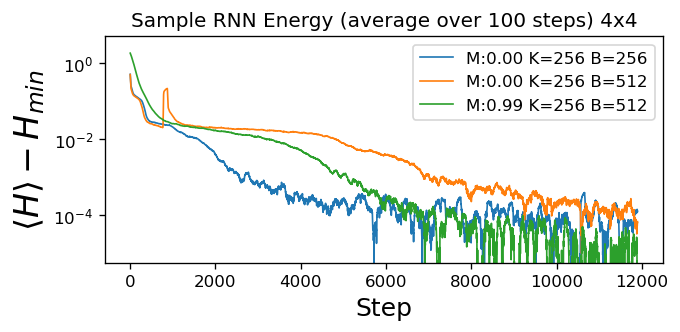

128 1 128 36
-0.422106388674842
512 4 128 36
-0.42218653413984514
512 4 128 36
-0.4222273617320591


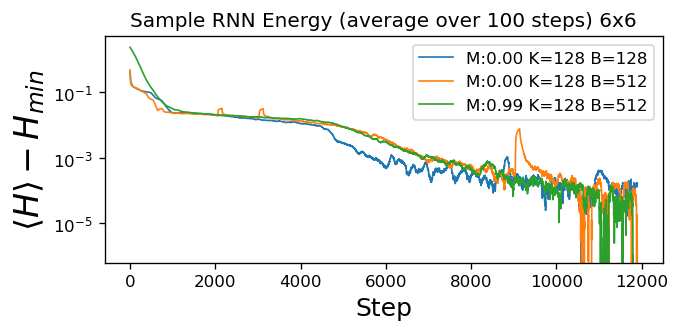

64 1 64 64
-0.40456113785505293
512 8 64 64
-0.3249058210849762
512 8 64 64
-0.40336380392313004


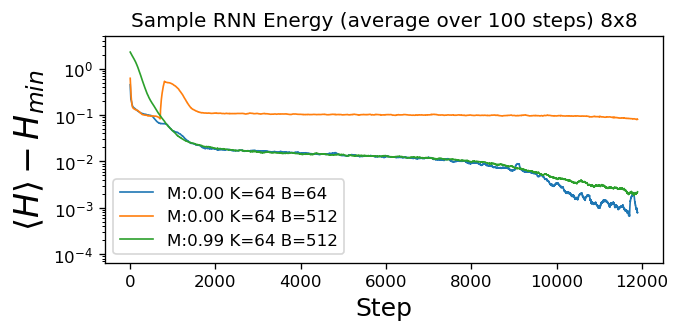

28 1 28 144
-0.37787084738413496
504 18 28 144
-0.37501972940233014
504 18 28 144
-0.37897185617023044


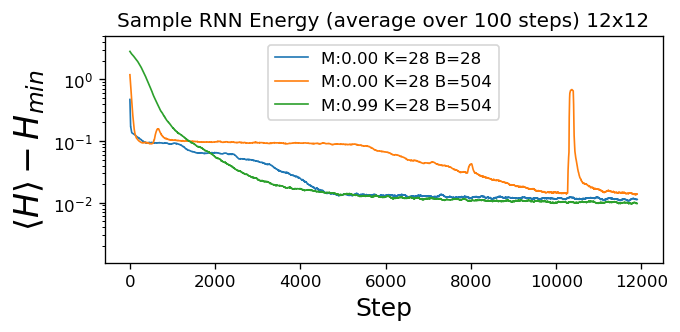

16 1 16 256
-0.36493719428777693
512 32 16 256
-0.36826002687215803
512 32 16 256
-0.36940828144550325


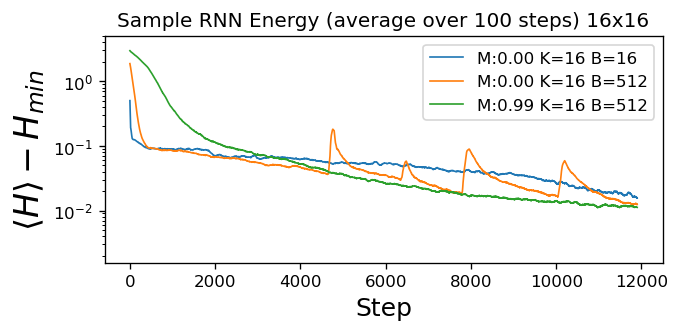

7 1 7 576
-0.31098560545179577
504 72 7 576
-0.11400383121437496
504 72 7 576
-0.3217812940809462


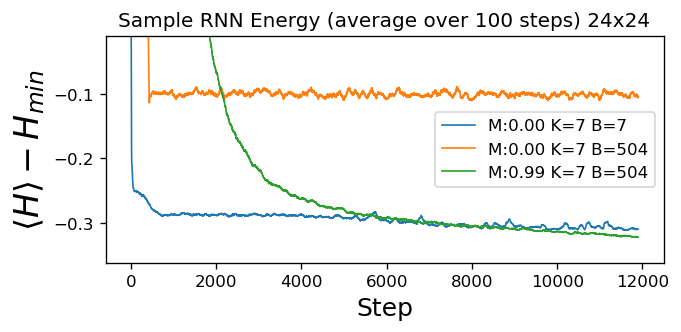

2 1 2 1024
-0.29086693078279496
512 256 2 1024
-0.2864133605360985
512 256 2 1024
-0.29154299318790433


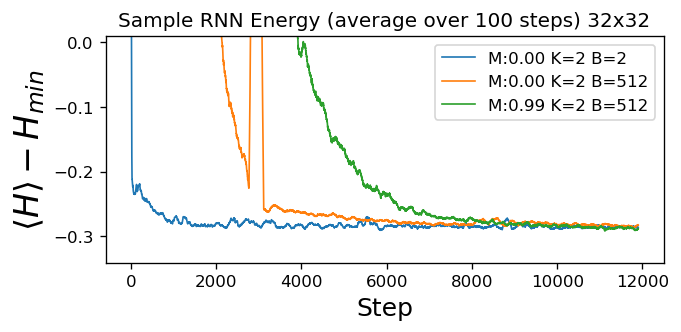

In [48]:
etable={16:-0.4534,36:-0.4221,64:-0.40522,144:-0.38852,256:-0.38052,576:-0,1024:-0,48*48:0,64*64:0}
def plot_sample(Lx,Ly,M,mydir=None,noqueue=False,idx=5):
    exact_energy = etable[Lx*Ly]
    bn = dict()
    for k in etable:bn[k]=k//8
    bn[1024]=256
    bn[48*48]=512
    if type(mydir)==type(None):
        bsize=512
        BlockNum=bn[(Lx*Ly)]
        BbyL=bsize//BlockNum
        bsize=BbyL*BlockNum
        
        if noqueue:
            bsize=BbyL
            print(BbyL,1,BbyL,Lx*Ly)
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,BbyL,BbyL)
        else:
            print(bsize,BlockNum,BbyL,Lx*Ly)
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,bsize,BbyL)
    
    DEBUG = np.load(mydir+"/DEBUG.npy")
    
    
    avgs = np.array([np.mean(DEBUG[i:i+100,idx]) for i in range(DEBUG.shape[0]-100)])
    
    
    plt.plot(avgs/Lx/Ly-exact_energy,linewidth=1.0,markevery=5,
             label="M:%.2f K=%d B=%d"%(M,BbyL,bsize))
    print(np.min(avgs/Lx/Ly))
    return np.min(avgs/Lx/Ly-exact_energy)
    
for x in [4,6,8,12,16,24,32]:
    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
    ref=plot_sample(x,x,0.0,noqueue=True)
    plot_sample(x,x,0.0)
    plot_sample(x,x,0.99)
    if x<24:
        plt.yscale("log")  
        plt.ylim(abs(ref)/10,5)
    else:
        plt.ylim(ref-0.05,ref+0.3)
    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
    plt.legend(loc="best")
    plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(x,x))
    plt.show()



In [17]:
run(48,0.99)
run(48,0.0)
run(48,0.0,noqueue=True)

1 1 1 2304
2.6984114413791236
512 512 1 2304
0.28778185314602317
512 512 1 2304
0.22111043718126086


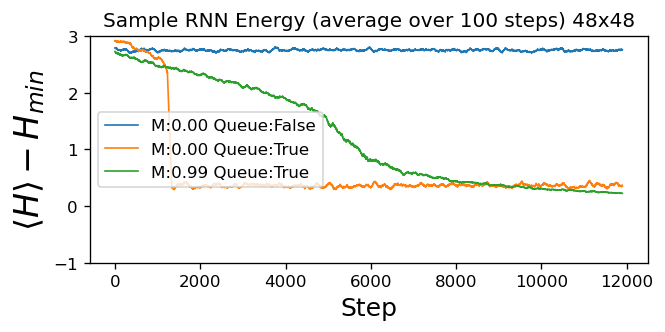

In [22]:
x=48
fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
ref=plot_sample(x,x,0.0,noqueue=True)
plot_sample(x,x,0.0)
plot_sample(x,x,0.99)

plt.ylim(-1,3)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(x,x))
plt.show()

In [26]:
run(4,0.96875)
run(6,0.96875)
run(8,0.96875)

256 1 256 16
-0.4534569150209427
512 2 256 16
-0.4533902561664581
512 2 256 16
-0.45347503781318665
-0.45352118760347365


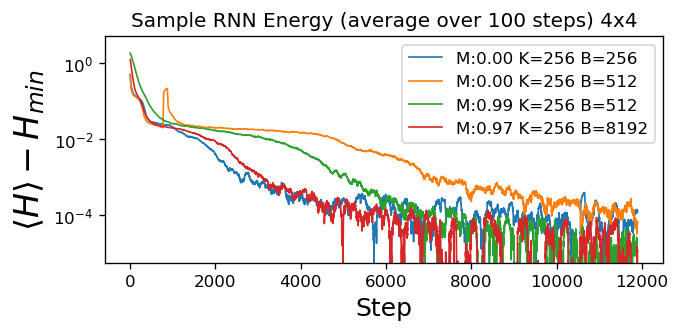

128 1 128 36
-0.422106388674842
512 4 128 36
-0.42218653413984514
512 4 128 36
-0.4222273617320591
-0.4221814250946045


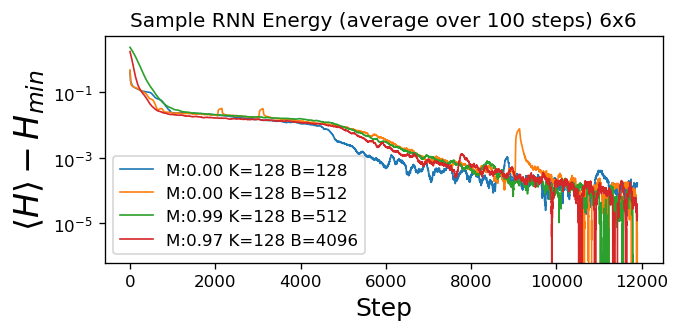

64 1 64 64
-0.40456113785505293
512 8 64 64
-0.3249058210849762
512 8 64 64
-0.40336380392313004
-0.4040218985080719


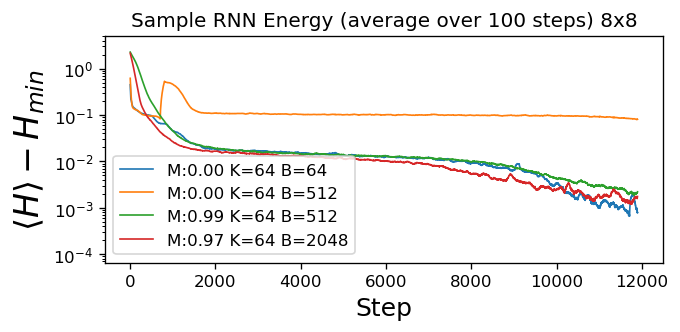

28 1 28 144
-0.37787084738413496
504 18 28 144
-0.37501972940233014
504 18 28 144
-0.37897185617023044
-0.37920419454574583


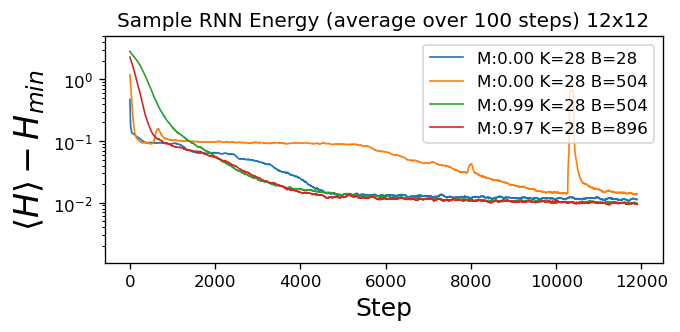

16 1 16 256
-0.36493719428777693
512 32 16 256
-0.36826002687215803
512 32 16 256
-0.36940828144550325
-0.37070374220609664


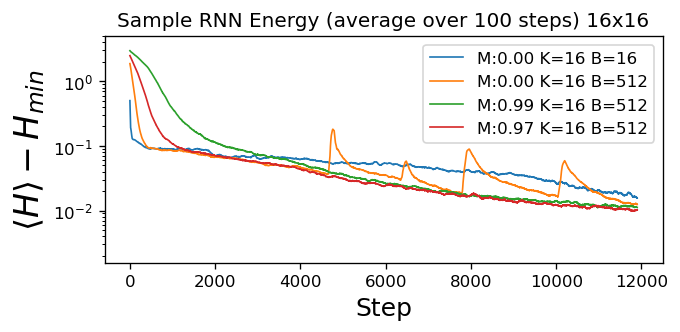

7 1 7 576
-0.31098560545179577
504 72 7 576
-0.11400383121437496
504 72 7 576
-0.3217812940809462
-0.30790590312745836


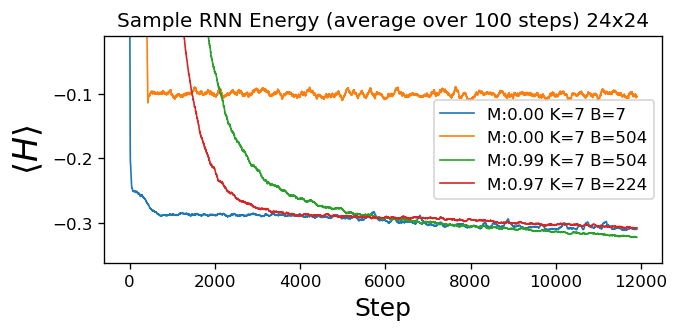

2 1 2 1024
-0.29086693078279496
512 256 2 1024
-0.2864133605360985
512 256 2 1024
-0.29154299318790433
-0.29186889678239825


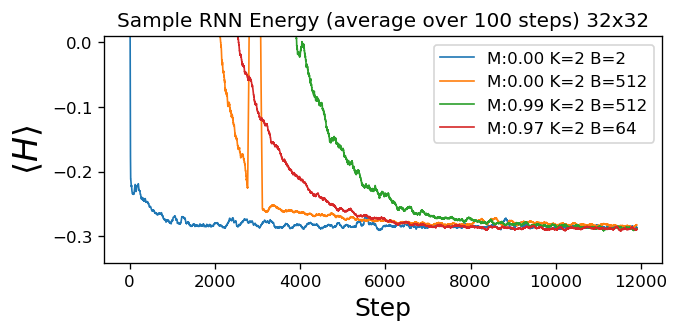

1 1 1 2304
2.6984114413791236
512 512 1 2304
0.28778185314602317
512 512 1 2304
0.22111043718126086
-0.27065560725000165


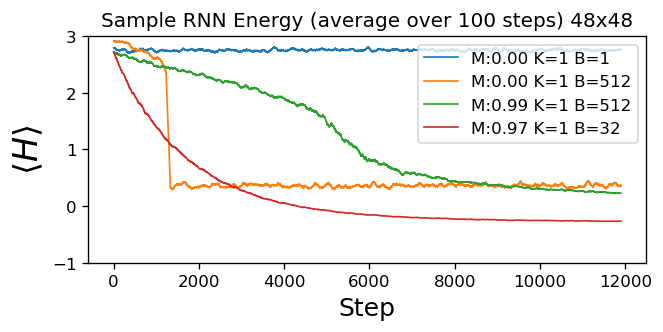

In [42]:
def plot_sample2(Lx,Ly,M,bsize,BbyL,noqueue=False,mydir=None,idx=5):
    exact_energy = etable[Lx*Ly]
    if type(mydir)==type(None):
        if noqueue:
            print(BbyL,1,BbyL,Lx*Ly)
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,BbyL,BbyL)
        else:
            mydir="out/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,bsize,BbyL)
    
    DEBUG = np.load(mydir+"/DEBUG.npy")
    
    
    avgs = np.array([np.mean(DEBUG[i:i+100,idx]) for i in range(DEBUG.shape[0]-100)])
    
    
    plt.plot(avgs/Lx/Ly-exact_energy,linewidth=1.0,markevery=5,
             label="M:%.2f K=%d B=%d"%(M,BbyL,bsize))
    print(np.min(avgs/Lx/Ly))
    return np.min(avgs/Lx/Ly-exact_energy)


Kdict={4*4:256,6*6:128,8*8:64,12*12:28,16*16:16,24*24:7,32*32:2,48*48:1,64*64:1}

for x in [4,6,8,12,16,24,32,48]:
    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
    ref=plot_sample(x,x,0.0,noqueue=True)
    plot_sample(x,x,0.0)
    plot_sample(x,x,0.99)
    plot_sample2(x,x,0.969,32*Kdict[x*x],Kdict[x*x])
    if x<24:
        plt.yscale("log")  
        plt.ylim(abs(ref)/10,5)
        plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
    else:
        plt.ylabel("$\\langle H \\rangle$",fontsize=20)
        plt.ylim(ref-0.05,ref+0.3)
        if x>32:
            plt.ylim(-1,3)
    plt.xlabel("Step",fontsize=15)
    
    plt.legend(loc="best")
    plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(x,x))
    plt.show()

-0.1849375756084919


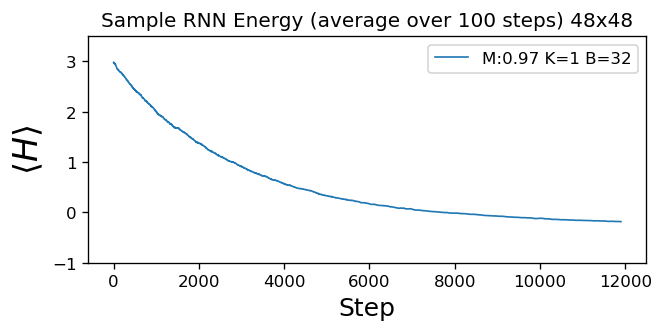

In [128]:
fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
plot_sample2(64,64,0.969,32*Kdict[64*64],Kdict[64*64])

plt.ylabel("$\\langle H \\rangle$",fontsize=20)
plt.ylim(-1,3.5)
plt.xlabel("Step",fontsize=15)

plt.legend(loc="best")
plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(48,48))
plt.show()

In [34]:
run(12,0.96875)
run(16,0.96875)
run(24,0.96875)
run(32,0.96875)
run(48,0.96875)

In [46]:
run(64,0.96875)

Text(0, 0.5, '$H_{min}$')

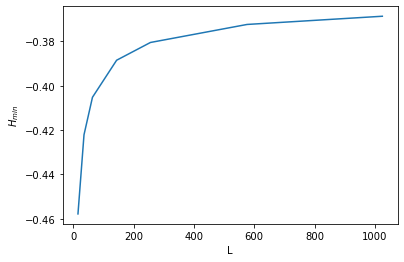

In [45]:
e={16:-0.45776822,36:-0.4221,64:-0.40522,144:-0.38852,256:-0.38052,576:-0.3724,1024:-0.3687}
ek=e.keys()
ke=[e[k] for k in ek]
plt.plot(ek,ke)
plt.xlabel("L")
plt.ylabel("$H_{min}$")

In [53]:
run(4,0.96875)

-0.45345971345901487
-0.45352118760347365


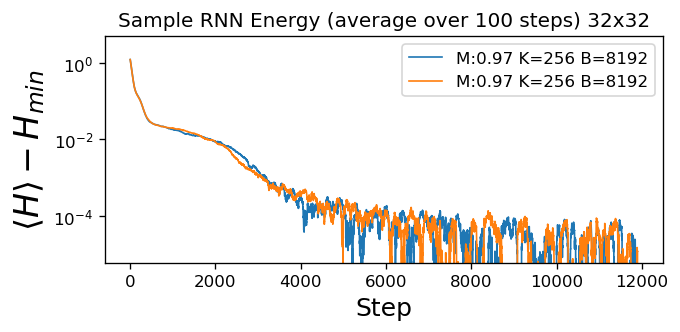

In [60]:
def ps2(Lx,Ly,M,bsize,BbyL,noqueue=False,mydir=None,idx=5):
    exact_energy = etable[Lx*Ly]
    if type(mydir)==type(None):
        if noqueue:
            print(BbyL,1,BbyL,Lx*Ly)
            mydir="res/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,BbyL,BbyL)
        else:
            mydir="res/%dx%d-M=%.3f-B=%d-K=%d"%(Lx,Ly,M,bsize,BbyL)
    
    DEBUG = np.load(mydir+"/DEBUG.npy")
    
    
    avgs = np.array([np.mean(DEBUG[i:i+100,idx]) for i in range(DEBUG.shape[0]-100)])
    
    
    plt.plot(avgs/Lx/Ly-exact_energy,linewidth=1.0,markevery=5,
             label="M:%.2f K=%d B=%d"%(M,BbyL,bsize))
    print(np.min(avgs/Lx/Ly))
    return np.min(avgs/Lx/Ly-exact_energy)
    
fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
ref = ps2(4,4,0.969,8192,256)
plot_sample2(4,4,0.969,32*Kdict[16],Kdict[16])
plt.yscale("log")  
plt.ylim(abs(ref)/10,5)
plt.xlabel("Step",fontsize=15)
plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
plt.legend(loc="best")
plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(x,x))
plt.show()


In [129]:
#timer = np.load("out/8x8-M=0.969-B=2048-K=64/DEBUG.npy")
timer = np.load("out/32x32-M=0.969-B=64-K=2/DEBUG.npy")

In [130]:
timer[2000][-1]

901.4045457839966

In [131]:
timer[11999][1]/32/32

-0.2869471311569214

-0.2893998324871063

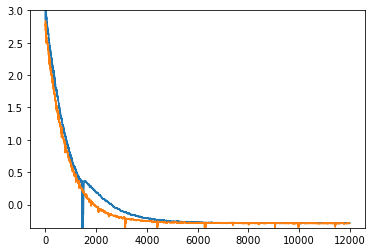

In [132]:
plt.plot(timer[:,1]/32/32)
timer = np.load("speedtests/SNAKE-32x32-M=0.969-B=64-K=2/DEBUG.npy")
plt.plot(timer[:,1]/32/32)
plt.ylim(-0.36,3)
timer[11999][1]/32/32

In [134]:
timer[1500][1]/32/32

0.20056501030921936

ok so the first thing I would like to see is TFIM, N=40 and N=100, J=-1, h=1 for no queue, and queue with momenta 0.1, 0.5, 0.9, 0.99. Just energy as a function of training iterations. The total number of samples used to calculate the energy should be the same with and without queue and all queue runs should have the same number of new samples per iteration

In [41]:
import os

In [ ]:
for L,loops in [(10,1),(40,1),(100,1),(500,4),(36,1)]:#[10,40,100,500]:
    for M in [31/32,0.1,0.5,0.9,0.99]:
        os.system("python RNN_QSR.py L=%d M=%f hamiltonian=TFIM h=-1.0 J=1.0 K=32 NLOOPS=%d"%(L,M,loops))

No handles with labels found to put in legend.


-0.6820439338684082


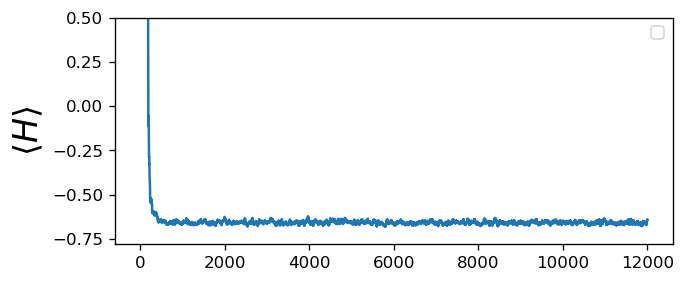

In [36]:
def plot(fn="out/TFIM-10-M=0.990-B=1024-K=32/DEBUG.npy",div=10):
    data = np.load(fn)

    fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')

    plt.plot(data[:,1]/div)
    print(np.min(data[:,1]/div))
    plt.ylim(np.min(data[:,1]/div)-0.1,0.5)
    
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)

    plt.legend(loc="best")
    #plt.title("Sample RNN Energy (average over 100 steps) %dx%d"%(x,x))
    plt.show()
plot()

In [2]:
import os
os.system("python RNN_QSR.py L=10 K=128 Q=8 hamiltonian=TFIM J=1.0 h=-1.0 USEQUEUE=0 NLOOPS=1 steps=4000")

0

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
import RNN_QSR
def getpaths(fn):
    allpaths=dict()
    for paths,folders,files in os.walk(fn):
        #print(paths)
        Lcomp=paths.split("-")[0].split("\\")

        if len(Lcomp)>2:
            Lcomp=int(Lcomp[2]) 
            if not Lcomp in allpaths:
                allpaths[Lcomp]=[paths]
            else:
                allpaths[Lcomp]+=[paths]
    return allpaths
allpaths=getpaths("out\\TFIM")      
print(allpaths.keys())


def graphs(allpaths,useTimes=False, metric="Sample"):
    idx = {"SAMPLE":5,"CORRECTED":3,"TRAIN":1}[metric.upper()]
    for key in sorted(allpaths.keys()):

        fig = plt.figure(1,figsize=(6,2.5), dpi=120, facecolor='w', edgecolor='k')
        plt.title("L = %d %s Energy"%(key,metric))
        if key in RNN_QSR.TFIM.En1:
            exact_energy=RNN_QSR.TFIM.En1[key]
            plt.yscale("log")
            plt.ylim(1e-5,5)
        else:
            exact_energy=0

        bestmin=1e-5
        ends=[]
        for path in allpaths[key]:
            DEBUG = np.load(path+"\\DEBUG.npy")
            times=DEBUG[:,-1]/60
            ends+=[times.max()]
            avgs=np.array([np.mean(DEBUG[i:i+200,idx]) for i in range(DEBUG.shape[0])])/key
            outs=avgs
            if exact_energy!=0:
                outs=np.clip(avgs,exact_energy+1e-6,10000)
                if outs.min()-exact_energy<bestmin:
                    bestmin=outs.min()-exact_energy
                    plt.ylim(bestmin/2,5)
            #print(outs.mean())

            label = path.split("-")[1]
            print("L=%d %s: %f"%(key,label,avgs.min()),end="|")
            #plt.plot(DEBUG[:,5]/Lx/Ly-exact_energy,alpha=0.1,color='b',marker='o',markersize=2,linewidth=0.0,markevery=5,label="RNN Sample")
            if useTimes:
                plt.plot(times,outs-exact_energy,'o',ms=0.5,lw=0.0,label=label)
            else:
                plt.plot(outs-exact_energy,'o',ms=0.5,lw=0.0,label=label)
        print()
        if useTimes:
            plt.xlim(0,np.median(ends))
            plt.xlabel("Time (min)",fontsize=15)
        else:
            plt.xlabel("Step")
        plt.ylabel("$\\langle H \\rangle-H_{min}$",fontsize=20)
        plt.legend(loc="best")
        plt.show()

cuda:0
dict_keys([10, 100, 36, 40, 500])


L=10 M=0.100: -1.238296|L=10 M=0.500: -1.238217|L=10 M=0.900: -1.238226|L=10 M=0.969: -1.238229|L=10 M=0.990: -1.238265|L=10 NoQ: -1.238166|


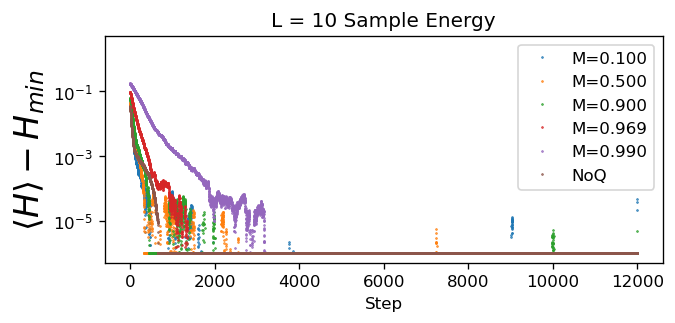

L=36 M=0.100: -1.263278|L=36 M=0.500: -1.263470|L=36 M=0.900: -1.263393|L=36 M=0.969: -1.263334|L=36 M=0.990: -1.263245|


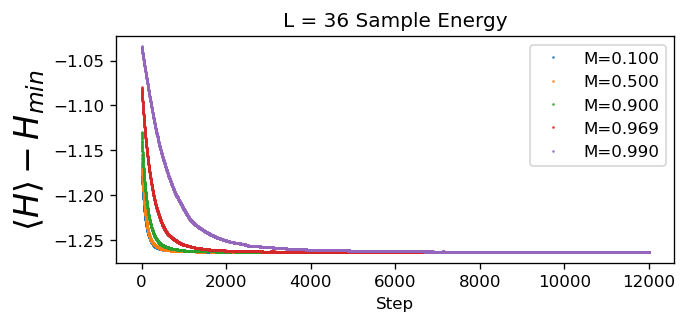

L=40 M=0.100: -1.264387|L=40 M=0.500: -1.264494|L=40 M=0.900: -1.264340|L=40 M=0.969: -1.264832|L=40 M=0.990: -1.264846|L=40 NoQ: -1.264237|


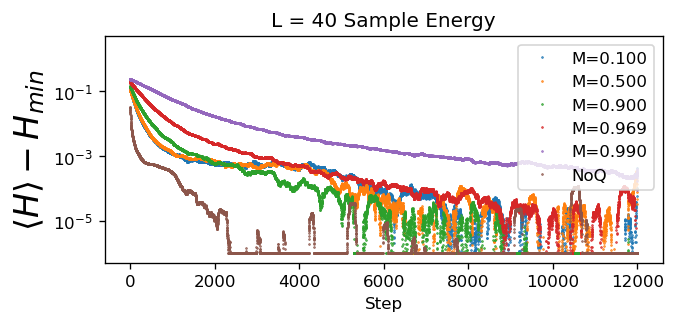

L=100 M=0.100: -1.269368|L=100 M=0.500: -1.270499|L=100 M=0.900: -1.269364|L=100 M=0.969: -1.269382|L=100 M=0.990: -1.266767|


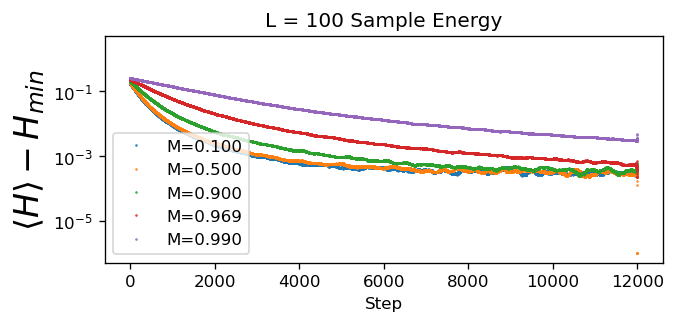

L=500 M=0.100: -1.270762|L=500 M=0.500: -1.270874|L=500 M=0.900: -1.267872|L=500 M=0.969: -1.256048|L=500 M=0.990: -1.207810|


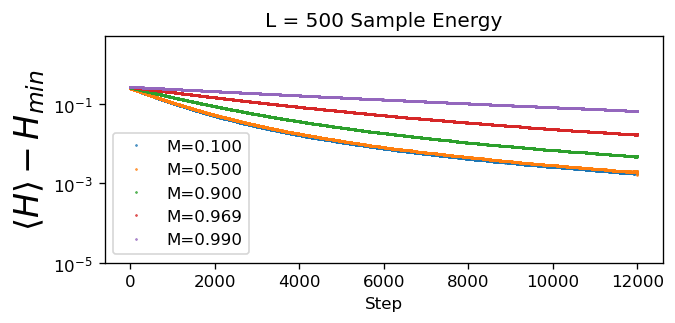

In [7]:
graphs(allpaths)

L=10 M=0.100: -1.238296|L=10 M=0.500: -1.238217|L=10 M=0.900: -1.238226|L=10 M=0.969: -1.238229|L=10 M=0.990: -1.238265|L=10 NoQ: -1.238166|


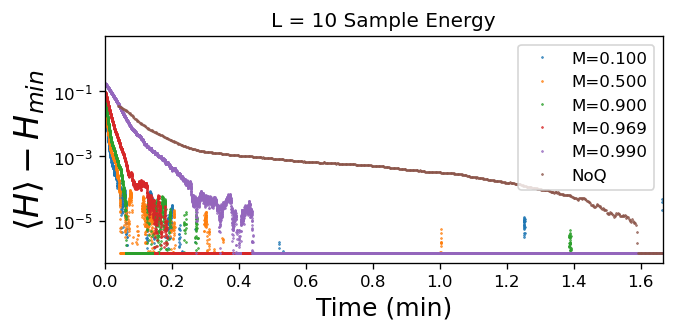

L=36 M=0.100: -1.263278|L=36 M=0.500: -1.263470|L=36 M=0.900: -1.263393|L=36 M=0.969: -1.263334|L=36 M=0.990: -1.263245|


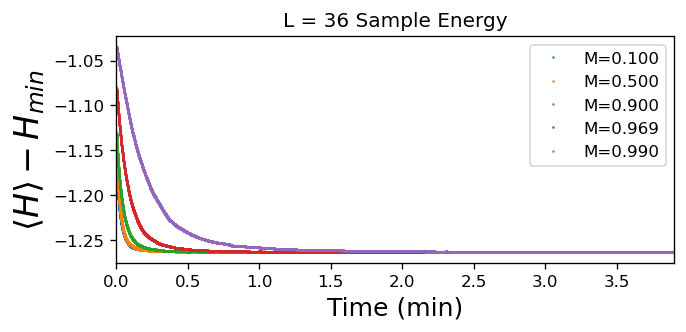

L=40 M=0.100: -1.264387|L=40 M=0.500: -1.264494|L=40 M=0.900: -1.264340|L=40 M=0.969: -1.264832|L=40 M=0.990: -1.264846|L=40 NoQ: -1.264237|


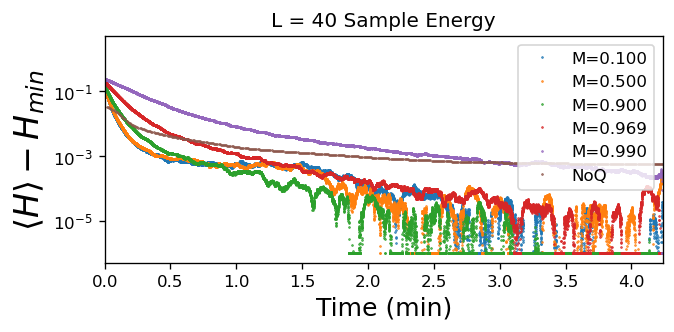

L=100 M=0.100: -1.269368|L=100 M=0.500: -1.270499|L=100 M=0.900: -1.269364|L=100 M=0.969: -1.269382|L=100 M=0.990: -1.266767|


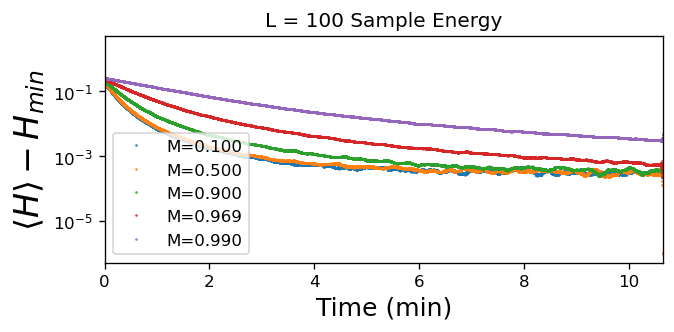

L=500 M=0.100: -1.270762|L=500 M=0.500: -1.270874|L=500 M=0.900: -1.267872|L=500 M=0.969: -1.256048|L=500 M=0.990: -1.207810|


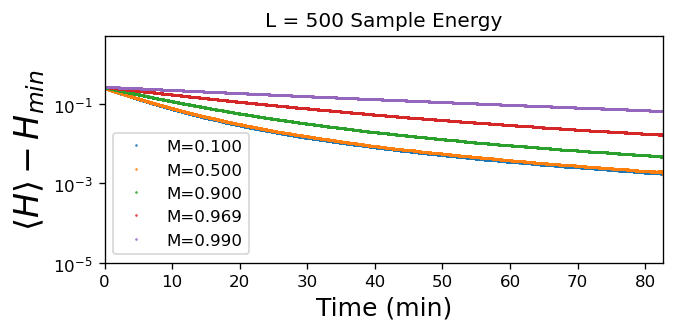

In [8]:
graphs(allpaths,useTimes=True)